# 1. Logistic Regression

### Preparation

In [1]:
# Install modules
!pip install adamp

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Import modules
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader

from adamp import SGDP

### Generate Dataset: `make_classification()`

In [3]:
# Generate dataset
x, y = make_classification(n_samples = 10000,         # Number of data
                           n_features = 5,            # Number of dependent variables (labels)
                           n_informative = 2,         # Variable coefficients that are actually meaningful among independent variables
                           n_redundant = 0,           # Unnecessary coefficients of independent variables derived from other independent variables
                           n_clusters_per_class = 1,  # Cluster coefficients by class
                           random_state = 85          # Random seed
                           )
print(x)
print(y)

[[ 1.00059111 -1.37818899  0.83050815 -0.35771846 -0.64576487]
 [ 1.32961892  0.57971042 -0.3616936   1.61049137  1.0286735 ]
 [ 0.98087369 -0.70900835  0.38862857 -0.76991642  2.14930673]
 ...
 [ 1.26091376  2.4714594  -1.67245494  0.97531328  0.78143792]
 [ 0.5601155   0.31772353  0.36982709  0.72977553 -1.62870768]
 [ 1.60472704 -0.90127217 -1.6969377  -1.3699188   1.35512967]]
[0 1 0 ... 1 1 1]


### Split Data to Train and Test Set

In [4]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 85)

print('x_train: ', len(x_train))
print('x_test: ', len(x_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

x_train:  8000
x_test:  2000
y_train:  8000
y_test:  2000


### Create a Custom Dataset using PyTorch's DataSet and DataLoader

In [5]:
# Create a CustomDataset
class MyCustomDataset(Dataset):
    
    # Initialize dataset
    def __init__(self, x, y):
        # Change to Tensor type
        self.x = torch.tensor(x, dtype = torch.float32)
        self.y = torch.tensor(y, dtype = torch.float32)
        #print(self.x, self.y)
    
    def __getitem__ (self, index):
        #print(self.x[index], self.y[index])
       
        return self.x[index], self.y[index]
        
    
    def __len__(self):
        return len(self.x)

    
# Define datasets
train_dataset = MyCustomDataset(x_train, y_train)
test_dataset = MyCustomDataset(x_test, y_test)
print(train_dataset, test_dataset)
    
# Define Data Loaders
train_loader = DataLoader(train_dataset,
                          batch_size = 32,
                          shuffle = True)
test_loader = DataLoader(test_dataset,
                         batch_size = 32,
                         shuffle = False)


<__main__.MyCustomDataset object at 0x00000220B1C2CEE0> <__main__.MyCustomDataset object at 0x00000220EAFD8550>


In [6]:
# Debugging code for Dataset
test = MyCustomDataset(x_test, y_test)
for i in test:
    pass

In [7]:
# Debugging code for Data Loaders
for index, (data, labels) in enumerate (test_loader):
    print(index, data, labels)

0 tensor([[ 1.6866, -0.7774, -1.2338, -1.0938, -0.6279],
        [ 0.9984, -1.0030,  1.3444, -0.9694,  1.1585],
        [-0.0802, -0.6326, -0.1613, -0.0884, -0.6644],
        [ 0.9454,  0.9844,  1.9048, -0.8504,  0.3159],
        [-0.7225,  0.5499,  1.4191,  1.3346,  1.0747],
        [ 0.8764, -0.2919, -0.5530, -0.4321,  2.6078],
        [ 0.7547, -0.1627, -1.3251,  1.1020, -1.4609],
        [ 1.0192, -1.4030,  1.3910, -0.2039, -0.7120],
        [ 0.9093, -0.9742, -0.5599, -0.8887,  0.2658],
        [ 1.5427,  1.2730, -0.0699,  0.0739, -2.4797],
        [ 0.3104,  1.1008, -0.6360,  0.4910, -0.9579],
        [ 0.3980,  0.4416, -0.2976,  1.8376,  1.7116],
        [ 1.0041,  0.1742,  0.9913, -0.3786,  1.1562],
        [ 3.1555, -0.5975, -3.5872,  1.6625, -0.9056],
        [ 1.0747,  0.5835,  1.5774,  0.0491,  1.1396],
        [ 0.9834,  1.1577,  0.7395,  0.4021,  0.3462],
        [ 0.9742,  1.5529,  0.8123,  0.4720,  0.5125],
        [ 1.0124,  0.0787,  1.2969,  1.6211,  0.5131],
        

        [ 1.0159, -0.3673,  1.1193,  0.2117, -0.0736]]) tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.])
54 tensor([[ 0.9858,  1.1794,  2.6758, -0.1028, -0.7341],
        [ 0.9547, -0.1573,  0.4230, -0.2075, -2.6819],
        [ 0.9402, -2.3259,  2.7623, -0.2128, -0.5553],
        [ 1.8982,  1.0363, -1.5950, -0.7232, -0.1111],
        [ 1.1253, -1.1758, -0.5997,  0.6332, -1.2313],
        [ 0.9494, -1.2238, -0.8562, -0.7361, -1.3008],
        [ 0.6943,  1.1823, -0.5177, -1.2909, -0.4637],
        [ 0.8147,  0.6737, -0.6396,  1.5069, -0.7163],
        [ 0.9874, -1.6363,  0.4739, -1.5878,  0.2961],
        [ 1.0287,  0.5274,  1.2001,  1.4038, -2.3140],
        [ 1.2899, -1.1283, -0.5056,  1.0139, -0.0239],
        [ 0.9725, -1.2007,  1.4646,  2.1657,  1.6515],
        [ 1.0049, -0.5437,  0.6967,  0.4758, -0.8787],
        [ 0.9748, -2.2076,  0.4929,  1.9925,  0.4381],
        [ 1.0086, -0.4589,

### Define Models

In [8]:
# Define a class
class LogisticRegression(nn.Module):
    
    # Initialize the class
    def __init__ (self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        print(self.linear)
            
        
    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out
    
model = LogisticRegression(input_dim = 5)
print(model)

Linear(in_features=5, out_features=1, bias=True)
LogisticRegression(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)


### Set Loss Function

In [9]:
# Set Loss Function
criterion = nn.BCELoss()  # Binary classification of '0' and '1'

 ### Define Optimizer

In [10]:
# Set Optimizer: SGDP
'''
optimizer = SGDP(params, lr=0.1, weight_decay=1e-5, momentum=0.9, nesterov=True)
'''
optimizer = SGDP(model.parameters(), 
                 lr = 0.01, 
                 weight_decay = 1e-5, 
                 momentum = 0.9, 
                 nesterov = True)

print(optimizer)

SGDP (
Parameter Group 0
    dampening: 0
    delta: 0.1
    eps: 1e-08
    lr: 0.01
    momentum: 0.9
    nesterov: True
    wd_ratio: 0.1
    weight_decay: 1e-05
)


In [11]:
# Set Optimizer: SGD
optimizer = optim.SGD(model.parameters(), 
                      lr = 0.01,
                      weight_decay = 1e-5,
                      momentum = 0.9,
                      nesterov = True)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: True
    weight_decay: 1e-05
)


### Fit Models

In [12]:
# Set parameters
num_epochs = 100

# Fit a model
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        
        #print(targets)
        #print(targets.unsqueeze(1))
        
        # Initialize optimizer
        optimizer.zero_grad()
        
        # Forward
        outputs = model(inputs)
        #print(outputs)
        
        # Set loss function
        loss = criterion(outputs, targets.unsqueeze(1))  # Rank1 tensor
        loss.backward()  # Give feedback (difference of loss) to optimizer
        #print(loss)
        
        optimizer.step()  # Move to next step
        
    if epoch % 10 == 0:
        print(f'Epoch: [{epoch} / {num_epochs}], Loss: [{loss.item()}]')
        
    '''
    Result: SGDP
        Epoch: [0 / 100], Loss: [0.16761554777622223]
        Epoch: [10 / 100], Loss: [0.10327471792697906]
        Epoch: [20 / 100], Loss: [0.08604089915752411]
        Epoch: [30 / 100], Loss: [0.11755272001028061]
        Epoch: [40 / 100], Loss: [0.1930246651172638]
        Epoch: [50 / 100], Loss: [0.4174855649471283]
        Epoch: [60 / 100], Loss: [0.21079085767269135]
        Epoch: [70 / 100], Loss: [0.2011759877204895]
        Epoch: [80 / 100], Loss: [0.17076903581619263]
        Epoch: [90 / 100], Loss: [0.20257718861103058]
        
    Result: SGD
        Epoch: [0 / 100], Loss: [0.0768309086561203]
        Epoch: [10 / 100], Loss: [0.39407554268836975]
        Epoch: [20 / 100], Loss: [0.21804843842983246]
        Epoch: [30 / 100], Loss: [0.19275110960006714]
        Epoch: [40 / 100], Loss: [0.10757364332675934]
        Epoch: [50 / 100], Loss: [0.13667017221450806]
        Epoch: [60 / 100], Loss: [0.49148982763290405]
        Epoch: [70 / 100], Loss: [0.33560556173324585]
        Epoch: [80 / 100], Loss: [0.37515658140182495]
        Epoch: [90 / 100], Loss: [0.06749152392148972]
    '''

Epoch: [0 / 100], Loss: [0.15072622895240784]
Epoch: [10 / 100], Loss: [0.32570570707321167]
Epoch: [20 / 100], Loss: [0.1023598462343216]
Epoch: [30 / 100], Loss: [0.24209636449813843]
Epoch: [40 / 100], Loss: [0.2295926958322525]
Epoch: [50 / 100], Loss: [0.0837148129940033]
Epoch: [60 / 100], Loss: [0.16380828619003296]
Epoch: [70 / 100], Loss: [0.2877562940120697]
Epoch: [80 / 100], Loss: [0.3277898132801056]
Epoch: [90 / 100], Loss: [0.2069711983203888]


### Evaluate Models

In [13]:
# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('The current device: ', device)

The current device:  cpu


In [14]:
# Evaluate model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for test_inputs, test_targets in test_loader:
        #print(test_inputs, test_targets)
        
        test_input, test_targets = test_inputs.to(device), test_targets.to(device)
        
        outputs = model(inputs)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += targets.size(0)
        #print(total)
        
        correct += (predicted == targets).sum().item()
        #print(correct)
    
    print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 46 %


# 2. Logistic Regression: Fashion-MNIST Dataset

- Image size: 28 x 28
- Gray scale
- 10 classes
  - 0: T-shirt/Top
  - 1: Trouser
  - 2: Pullover
  - 3: Dress
  - 4: Coat
  - 5: Sandals
  - 6: Shirt
  - 7: Sneakers
  - 8: Bag
  - 9: Ankle Boots

### Preparation

In [33]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms

### Prepare Dataset

In [16]:
# Download dataset
train_dataset = dataset.FashionMNIST(root = './data/0626-FashionMNIST',
                                     train = True,
                                     transform = transforms.ToTensor(),
                                     download = True)

test_dataset = dataset.FashionMNIST(root = './data/0626-FashionMNIST',
                                    train = False,
                                    transform = transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/0626-FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/0626-FashionMNIST\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/0626-FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/0626-FashionMNIST\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/0626-FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/0626-FashionMNIST\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/0626-FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/0626-FashionMNIST\FashionMNIST\raw



In [17]:
# Set Data Loader
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)
print(train_loader, test_loader)

<torch.utils.data.dataloader.DataLoader object at 0x00000220B4273DC0> <torch.utils.data.dataloader.DataLoader object at 0x00000220B4273A30>


### Define Models

In [18]:
# Define a class
class LogisticRegression(nn.Module):
    # Initialize model
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        return out

### Set parameters

In [19]:
# Set parameters
input_size = 28 * 28
num_classes = 10
num_epochs = 10
learning_rate = 0.001

total_step = len(train_loader)

### Set Model, Loss, Optimizer

In [20]:
# Define a model
model = LogisticRegression(input_size, num_classes)

# Set Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# Set optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

### Check device

In [21]:
# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('The current device: ', device)
model.to(device)

The current device:  cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

### Fit Models

Epoch [1/10], Step [100/600], Loss: 2.0870, Train ACC: 0.3800
Epoch [1/10], Step [200/600], Loss: 1.9856, Train ACC: 0.4300
Epoch [1/10], Step [300/600], Loss: 1.8235, Train ACC: 0.4667
Epoch [1/10], Step [400/600], Loss: 1.6861, Train ACC: 0.5150
Epoch [1/10], Step [500/600], Loss: 1.6799, Train ACC: 0.5180
Epoch [1/10], Step [600/600], Loss: 1.5936, Train ACC: 0.5300
Epoch [2/10], Step [100/600], Loss: 1.4606, Train ACC: 0.6200
Epoch [2/10], Step [200/600], Loss: 1.4206, Train ACC: 0.6400
Epoch [2/10], Step [300/600], Loss: 1.3503, Train ACC: 0.6333
Epoch [2/10], Step [400/600], Loss: 1.3743, Train ACC: 0.6200
Epoch [2/10], Step [500/600], Loss: 1.2180, Train ACC: 0.6440
Epoch [2/10], Step [600/600], Loss: 1.2444, Train ACC: 0.6400
Epoch [3/10], Step [100/600], Loss: 1.1479, Train ACC: 0.7100
Epoch [3/10], Step [200/600], Loss: 1.2401, Train ACC: 0.6850
Epoch [3/10], Step [300/600], Loss: 1.2656, Train ACC: 0.6600
Epoch [3/10], Step [400/600], Loss: 1.2439, Train ACC: 0.6525
Epoch [3

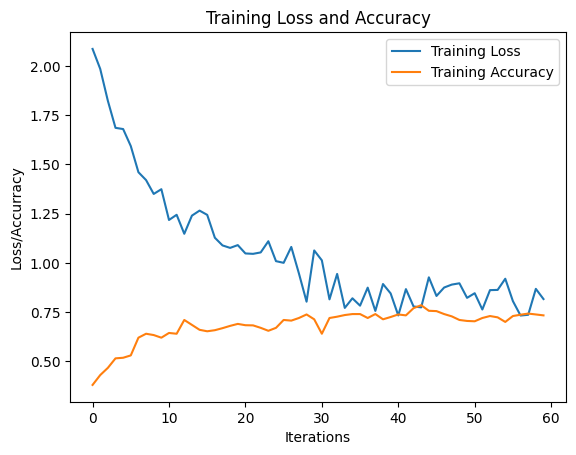

In [22]:
# Initialize parameters
loss_list = []
acc_list = []

# Fit models
for epoch in range(num_epochs):
    
    # Initalize parameters
    correct = 0
    total = 0
    
    # 
    for i, (images, labels) in enumerate(train_loader):
        # Load data
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        # Initialize optimizer
        optimizer.zero_grad()
        
        # Calculate 순전파 and Loss
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Update 역전파 and Weight
        loss.backward()
        optimizer.step()
        
        # Display logs
        if (i + 1) % 100 == 0:
            loss_list.append(loss.item())
            
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)

            correct += (predicted == labels).sum().item()
            
            acc_list.append(correct / total)
            
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train ACC: {:.4f}'.
                  format(epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))
            
# Visualization
plt.plot(loss_list, label = 'Training Loss')
plt.plot(acc_list, label = 'Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Loss/Accurracy')
plt.title('Training Loss and Accuracy')
plt.legend()
plt.show()

### Test Models

In [37]:
# Load images for test
dataiter = iter(test_loader)
print(dataiter)

images, labels = dataiter.__next__()
print(images)
images = images.reshape(-1, 28*28)
print(images)
print(labels)

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [31]:
# Predict models
outputs = model(images)
print(outputs)

_, predicted = torch.max(outputs.data, 1)
print(predicted)

tensor([[-2.3112e+00, -2.5201e+00, -1.0659e+00, -1.9345e+00, -7.5361e-01,
          2.4770e+00, -1.0338e+00,  1.9804e+00,  1.5389e+00,  3.1770e+00],
        [ 1.8012e-01, -3.1460e+00,  5.0509e+00, -1.7378e+00,  2.9204e+00,
         -1.1704e+00,  3.0526e+00, -3.1857e+00, -5.5251e-03, -1.5593e+00],
        [ 9.1770e-01,  6.2980e+00, -1.4777e-01,  2.2927e+00,  9.3984e-01,
         -2.9241e+00,  6.0460e-02, -2.4679e+00, -2.0932e+00, -2.3447e+00],
        [ 4.2809e-01,  5.0493e+00,  2.1202e-02,  2.2770e+00,  6.6625e-01,
         -2.3936e+00, -1.3435e-01, -2.2033e+00, -2.0462e+00, -1.4253e+00],
        [ 1.0182e+00, -1.4639e+00,  1.4829e+00, -5.8438e-01,  5.9294e-01,
         -5.1662e-01,  2.0510e+00, -1.8939e+00, -1.8845e-01, -7.1288e-01],
        [ 1.5378e+00,  4.2341e+00,  1.3779e-01,  1.4338e+00,  1.4827e+00,
         -2.7001e+00,  7.6828e-01, -2.5141e+00, -1.9491e+00, -2.3438e+00],
        [ 1.0062e+00, -6.9204e-01,  9.1541e-01, -9.7050e-01,  1.9079e+00,
         -5.9981e-01,  1.0155e+0

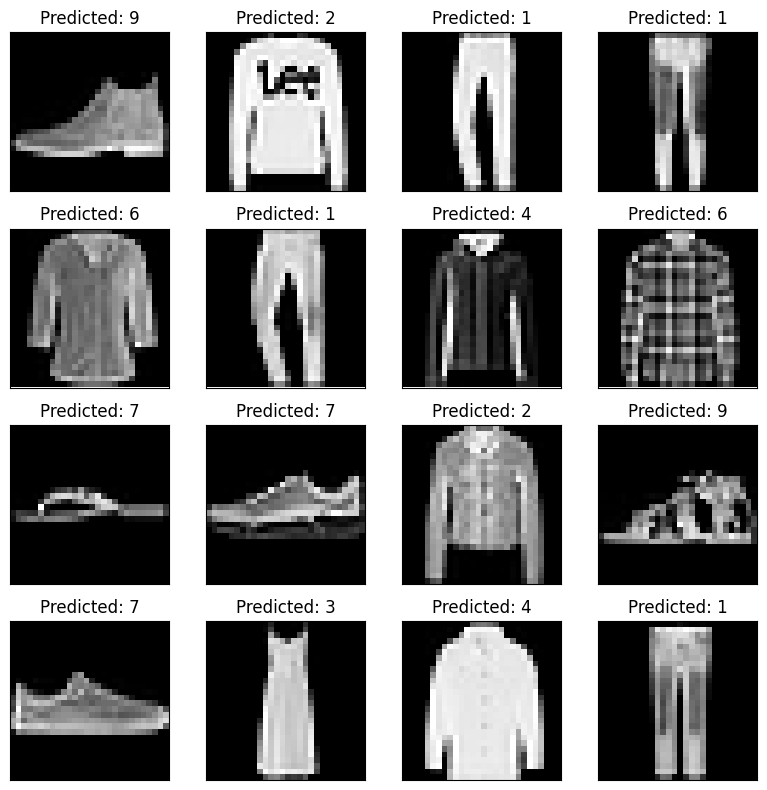

In [36]:
# Visualization
fig, axes = plt.subplots(nrows = 4,
                         ncols = 4,
                         figsize = (8, 8),
                         subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in enumerate (axes.flat):
    ax.imshow(np.squeeze(images[i].reshape(28, 28)), cmap='gray')
    ax.set_title(f'Predicted: {predicted[i].item()}')
plt.tight_layout()
plt.show()

# 3. Logistic Regression Ensemble

### Preparation

In [38]:
# Import modules
import torch
import torch.nn as nn  # Models
import torch.optim as optim  # Optimizers

from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare Dataset

In [43]:
# Download dataset
dataset = FashionMNIST(root = './data/0626-FashionMNIST',
                        train = True,
                        transform = ToTensor(),
                        download = True)
#print(dataset)

# Split dataset
train_set, val_set = train_test_split(dataset,
                                      test_size = 0.1,
                                      random_state = 85)
#print(train_set, val_set)

# Set DataLoader
train_loader = DataLoader(train_set, 
                          batch_size = 100,
                          shuffle = True)
val_loader = DataLoader(val_set,
                        batch_size = 100,
                        shuffle = False)
print(train_loader, val_loader)

<torch.utils.data.dataloader.DataLoader object at 0x000002208F6EACA0> <torch.utils.data.dataloader.DataLoader object at 0x000002208F6EA250>


### Define Modules

In [62]:
# Define a modules
class LogisticRegression(nn.Module):
    def __init__ (self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        #print('self.linear: ', self.linear)
    
    def forward(self, x):
        out = self.linear(x)
        
        return out

### Set Hyperparameters

In [79]:
# Set parameters
input_size = 28 * 28
num_classes = 10
num_epochs = 10
learning_rate = 0.1
num_models = 5  # Number of models for ensenble

### Generate Ensemble Models

In [76]:
# Generate ensemble models
models = [LogisticRegression(input_size, num_classes) for _ in range(num_models)]
print(models)

[LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
), LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)]


### Define Loss Function and Optimizers

In [77]:
# Define Loss Function
criterion = nn.CrossEntropyLoss()
print(criterion)

# Define optimizers
optimizers = [optim.SGD(model.parameters(), lr = learning_rate) for model in models]
print(optimizers)

CrossEntropyLoss()
[SGD (
Parameter Group 0
    dampening: 0
    lr: 0.05
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    lr: 0.05
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    lr: 0.05
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    lr: 0.05
    momentum: 0
    nesterov: False
    weight_decay: 0
), SGD (
Parameter Group 0
    dampening: 0
    lr: 0.05
    momentum: 0
    nesterov: False
    weight_decay: 0
)]


### Fit Models

In [80]:
# Fit models
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Load data
        images = images.reshape(-1, input_size)
        labels = labels
        #print('images: ', images, 'labels: ', labels)
        
        # Calculate progaganda and loss
        for j in range(num_models):
            outputs = models[j](images)
            loss = criterion(outputs, labels)
            #print('outputs: ', outputs, 'loss: ', loss.item())
            
            # Update Backpropaganda and Weights
            optimizers[j].zero_grad()
            loss.backward()
            optimizers[j].step()
    
    # Validate models
    with torch.no_grad():
        # Initialize values
        total, correct = 0, 0
        
        # Get values
        for images, labels in val_loader:
            images = images.reshape(-1, input_size)
            
            # Initialize output tensors to update predicted values
            outputs = torch.zeros(images.size()[0], num_classes)
            
            # Predict ensemble models
            for j in range(num_models):
                outputs += models[j](images)
                
            # Get the max outcome
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        val_acc = 100 * correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {val_acc:.2f}%')

Epoch [1/10], Validation Accuracy: 84.37%
Epoch [2/10], Validation Accuracy: 84.78%
Epoch [3/10], Validation Accuracy: 84.63%
Epoch [4/10], Validation Accuracy: 84.97%
Epoch [5/10], Validation Accuracy: 84.97%
Epoch [6/10], Validation Accuracy: 84.70%
Epoch [7/10], Validation Accuracy: 84.92%
Epoch [8/10], Validation Accuracy: 85.27%
Epoch [9/10], Validation Accuracy: 85.37%
Epoch [10/10], Validation Accuracy: 85.37%


# 4. Decision Boundary Function

### Preparation

In [81]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

### Prepare Data

In [84]:
# Generate data
x = torch.randn(100, 2)
y = ((x[:, 0] > 0.5) & (x[:, 1] > 0.5)).float()  # Answers for validation

print(x, y)

tensor([[-1.5930, -0.0580],
        [ 1.3080,  0.0681],
        [-0.0373,  0.4484],
        [-2.6416,  0.1824],
        [-0.6880, -0.5723],
        [-0.4352,  0.9497],
        [-1.4064, -0.7932],
        [-1.8514,  0.0937],
        [-0.0732,  2.2793],
        [-1.1517,  1.0262],
        [ 0.4203,  0.1418],
        [ 0.0303,  0.2713],
        [-0.1759,  2.8349],
        [ 0.9297, -1.1516],
        [-0.0399,  1.5177],
        [ 1.2144, -1.5307],
        [-1.0618,  0.1134],
        [-0.1222, -0.0263],
        [-0.3535, -1.0154],
        [-0.4370,  1.0896],
        [ 0.8262,  2.3615],
        [-0.5131,  0.2543],
        [-0.8376, -0.5784],
        [ 0.0449,  0.8501],
        [ 0.9159, -0.7898],
        [-0.6348,  0.3634],
        [-0.0265, -1.5351],
        [-1.2610, -0.2391],
        [ 1.0703,  1.8126],
        [-0.8019,  1.5317],
        [-0.6612,  0.8623],
        [-0.9077,  0.8944],
        [ 0.2986, -0.4323],
        [-0.6147,  0.4736],
        [ 2.1725,  1.5638],
        [ 0.7790, -1

### Define Models

In [88]:
# Define models
class LogisticRegression(torch.nn.Module):
    
    # Initialize models
    def __init__ (self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        #print(self.linear)
        
    def forward(self, x):
        outputs = self.linear(x)
        return F.sigmoid(outputs)
        
        
model = LogisticRegression(input_dim = 2, output_dim = 1)
print(model)

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


### Fit Models

C:\Users\genih\AppData\Roaming\Python\Python38\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


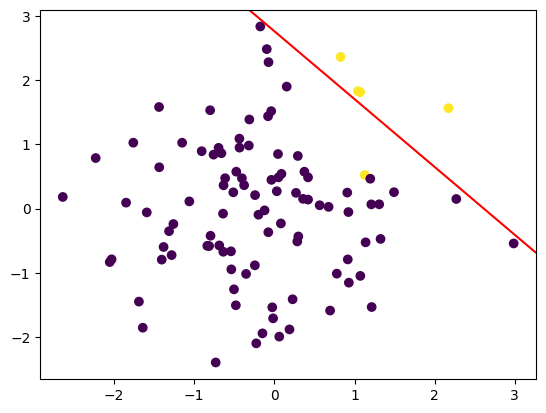

In [90]:
# Set parameters
learning_rate = 0.1

# Set Loss Function
criterion = torch.nn.BCELoss()

# Set optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Fit models
for epoch in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# Draw Decision Boundary
plt.scatter(x[:, 0], x[:, 1], c = y)
x_min, x_max = plt.xlim()  # Min and Max values of X-axis
y_min, y_max = plt.ylim()  # Min and Max values of Y-axis

xx, yy = np.meshgrid(    # Create mesh points
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

# Define 'z'
# Set 'xx', 'yy' 
# -> `np.c_[xx, yy]`: connect 'xx' and 'yy' 
# -> Change to Tensors
# -> ravel()
# -> Change Rank2 Tensor to Rank1 Tensor
# -> pass model
# -> `.detach().numpy`: Pass predicted values in Numpy format
# -> store it in 'z'
z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float32)).detach().numpy()
z = z.reshape(xx.shape)

plt.contour(  # Draw a decision boundary based on xx, yy values
    xx, 
    yy, 
    z, 
    levels=[0.5], 
    colors = 'r'
)
plt.show()